In [11]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random

In [12]:
data = load_iris()
X=data['data']
y=data['target']
cols=data['feature_names']
df=pd.DataFrame(X,columns=cols)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
df1 = df.copy()
df1['especies'] = y
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especies
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
df1['especies'].value_counts()

2    50
1    50
0    50
Name: especies, dtype: int64

In [16]:
km=KMeans(n_clusters=3)
km.fit(df)
df['c']=km.labels_ # Cria a coluna 'c' com os labels de cada um dos três clusters
df['tgt']=y

In [17]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),c,tgt
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
5,5.4,3.9,1.7,0.4,0,0
6,4.6,3.4,1.4,0.3,0,0
7,5.0,3.4,1.5,0.2,0,0
8,4.4,2.9,1.4,0.2,0,0
9,4.9,3.1,1.5,0.1,0,0


In [18]:
df.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),c,tgt
140,6.7,3.1,5.6,2.4,2,2
141,6.9,3.1,5.1,2.3,2,2
142,5.8,2.7,5.1,1.9,1,2
143,6.8,3.2,5.9,2.3,2,2
144,6.7,3.3,5.7,2.5,2,2
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,1,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2
149,5.9,3.0,5.1,1.8,1,2


In [19]:
df.iloc[55:65,4:6]

,c,tgt
55,1,1
56,1,1
57,1,1
58,1,1
59,1,1
60,1,1
61,1,1
62,1,1
63,1,1
64,1,1


In [21]:
certos = 0
for i in range(len(df)):
    if df.iloc[i,5] == 0 and df.iloc[i,4] ==0:
        certos+=1
    if df.iloc[i,5] == 2 and df.iloc[i,4] ==2:
        certos+=1
    if df.iloc[i,5] == 1 and df.iloc[i,4] ==1:
        certos+=1
certos/len(df)

0.8933333333333333

In [27]:
nova = [5, 3.4, 1.3, 0.25]

km.predict([nova])

array([0], dtype=int32)

In [29]:
nova_2 = [4.9, 3.0, 1.4, 0.2] 
km.predict([nova_2])

array([0], dtype=int32)

In [31]:
print(km.cluster_centers_)
print(km.labels_)

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


2 - Montando os gráficos de pontos levando em conta duas features por vez (duas dimensões x e y). 

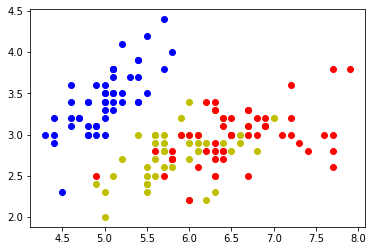

In [42]:
cor = ['bo', 'yo', 'ro'] 
for i in range(len(df)): #features 0 e 1
    plt.plot(df.iloc[i,0], df.iloc[i,1], cor[y[i]]) # Separa por cor baseado no target 
                                                    # y
    
plt.show()

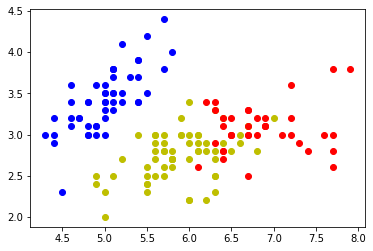

In [43]:
cor = ['bo', 'yo', 'ro']
for i in range(len(df)): #features 0 e 1
    plt.plot(df.iloc[i,0], df.iloc[i,1], cor[df.iloc[i,4]]) # Separa por cor, baseado 
                                                      # na quarta coluna 'c' (cluster) 
    
plt.show()

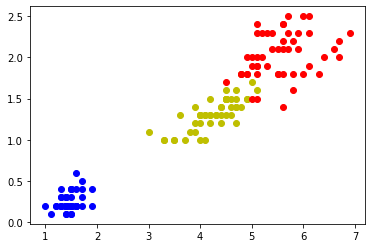

In [44]:
cor = ['bo', 'yo', 'ro']
for i in range(len(df)): # features 2 e 3
    plt.plot(df.iloc[i,2], df.iloc[i,3], cor[y[i]])
    
plt.show()
    

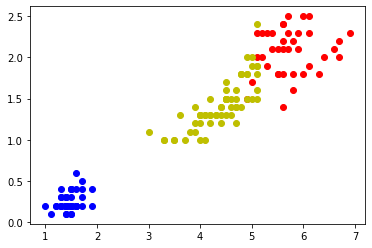

In [37]:
cor = ['bo', 'yo', 'ro']
for i in range(len(df)): # features 2 e 3
    plt.plot(df.iloc[i,2], df.iloc[i,3], cor[df.iloc[i,4]])
    
plt.show()

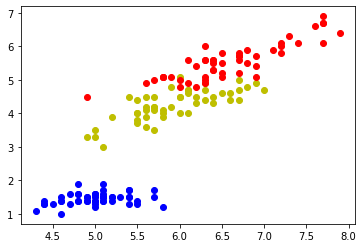

In [38]:
cor = ['bo', 'yo', 'ro']
for i in range(len(df)): # features 0 e 2
    plt.plot(df.iloc[i,0], df.iloc[i,2], cor[y[i]])
    
plt.show()
    

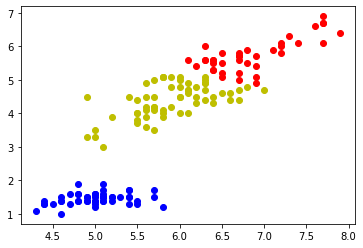

In [39]:
cor = ['bo', 'yo', 'ro']
for i in range(len(df)): # features 0 e 2
    plt.plot(df.iloc[i,0], df.iloc[i,2], cor[df.iloc[i,4]])
    
plt.show()

In [73]:
# # Gerando números aleatórios com random
# x=8*random.random()
# y=7*random.random()

# clt = km.predict([[xy]])
# clt

In [45]:
# f1_min = df['sepal length (cm)'].min()


f1_min = df['sepal length (cm)'].min() # Valor mínimo da variável sepal length (cm)
f1_min

7.9